<a href="https://colab.research.google.com/github/TrongAnh2210/AI_Homework/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

In [5]:
folder = '/content/gdrive/MyDrive/Face'
photos, labels = list(), list()
# Load and preprocess the data
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if  file.startswith('Heart'):
        output = 1.0
  elif file.startswith('Oblong'):
        output = 2.0
  elif file.startswith('Oval'):
        output = 3.0
  elif file.startswith('Round'):
        output = 4.0
  elif file.startswith('Square'):
        output = 5.0
  photo = load_img(folder + '/' + file, target_size= (30,40,3))
  photo= img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/gdrive/MyDrive/result_face/Face_photos.npy', photos)
save('/content/gdrive/MyDrive/result_face/Face_labels.npy', labels)

(901, 30, 40, 3) (901,)


In [6]:

# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/gdrive/MyDrive/result_face/Face_photos.npy')
labels = np.load('/content/gdrive/MyDrive/result_face/Face_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)
print(photos.shape, labels.shape)
# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:7], labels[:7]
train_x, train_y = photos[7:], labels[7:]

(901, 30, 40, 3) (901, 6)


In [7]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

In [8]:
# Tạo ra mô hình mạng CNN để train

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 40, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 38, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 8, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 8, 64)          3

In [29]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,fill_mode='nearest')

datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=100), epochs=20 , validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y) 
print('Test accuracy:', test_acc)

Epoch 1/20
9/9 [==============================] - 5s 340ms/step - loss: 0.1760 - accuracy: 0.9362 - val_loss: 1.6985 - val_accuracy: 0.7143
Epoch 2/20
9/9 [==============================] - 3s 307ms/step - loss: 0.1862 - accuracy: 0.9474 - val_loss: 1.2248 - val_accuracy: 0.8571
Epoch 3/20
9/9 [==============================] - 4s 466ms/step - loss: 0.1728 - accuracy: 0.9407 - val_loss: 1.9241 - val_accuracy: 0.4286
Epoch 4/20
9/9 [==============================] - 4s 369ms/step - loss: 0.1529 - accuracy: 0.9452 - val_loss: 1.6155 - val_accuracy: 0.7143
Epoch 5/20
9/9 [==============================] - 3s 303ms/step - loss: 0.1870 - accuracy: 0.9396 - val_loss: 1.8921 - val_accuracy: 0.7143
Epoch 6/20
9/9 [==============================] - 3s 298ms/step - loss: 0.1327 - accuracy: 0.9497 - val_loss: 2.0083 - val_accuracy: 0.5714
Epoch 7/20
9/9 [==============================] - 3s 293ms/step - loss: 0.1709 - accuracy: 0.9485 - val_loss: 1.7229 - val_accuracy: 0.7143
Epoch 8/20
9/9 [====

Test loss: 1.2993428707122803
Test accunacy 0.8571428656578064


Text(0.5, 1.0, 'Training & Testing Accuracy')

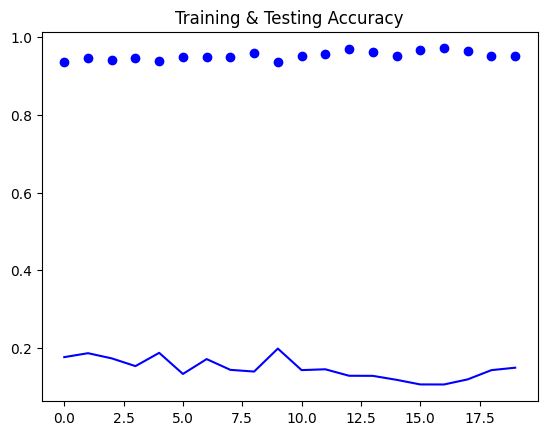

In [30]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

1/1 [==============================] - 0s 21ms/step
Square face :
Thông minh duệ trí, là ngưòi theo chủ nghĩa hoàn mỹ, linh hoạt giỏi biến hóa, tính cảnh giác cao.
Thích sạch sẽ, tâm địa lương thiện, dễ có đầu không có cuối 



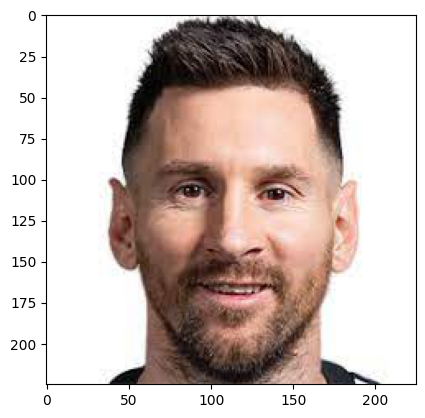

1/1 [==============================] - 0s 22ms/step
Heart face :
Linh động, biết bảo vệ mình nhưng đôi khi suy nghĩ quá cực đoan.
Quá cầu toàn trong mọi việc nên thưòng vì cái nhỏ mà mất cái lớn
 


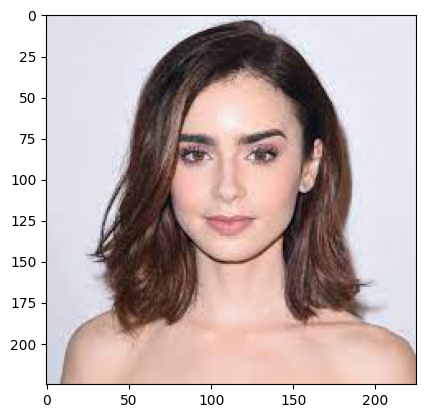

1/1 [==============================] - 0s 27ms/step
Oblong face :
Nhiều tâm tư, nhanh nhạy giỏi biện hộ, không cam tâm khuất phục.
Đam mê nghiên cứu, khả năng phân tích tốt, hay nghi ngờ 



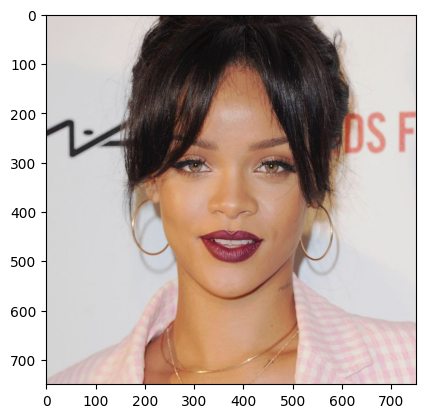

1/1 [==============================] - 0s 23ms/step
Oval face :
Cá tính thiên biến vạn hóa khó nắm bắt,
tạo cảm giác thần bí. Không thích bị quản thúc, thích lãnh đạo, ưa nịnh, có duyên đào hoa.



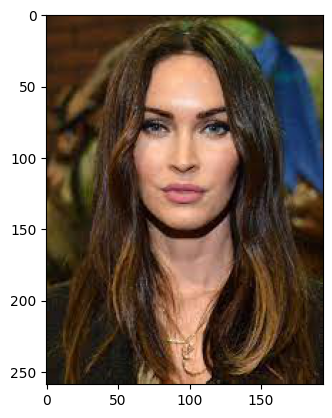

1/1 [==============================] - 0s 22ms/step
Round face:
Hiếu động, thích tự do, siêng năng làm việc.
Không chịu cúi mình khuất phục, thích lãnh đạo, không thích nói nhiều, nhiều hoài bão, muốn lập nên nghiệp lớn, là người theo chủ nghĩa hoàn mỹ. 



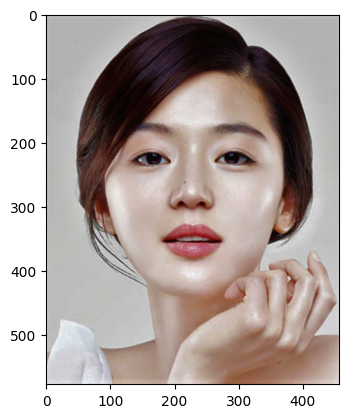

In [40]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/gdrive/MyDrive/face_test'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (30, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ','Heart face :\nLinh động, biết bảo vệ mình nhưng đôi khi suy nghĩ quá cực đoan.\nQuá cầu toàn trong mọi việc nên thưòng vì cái nhỏ mà mất cái lớn\n ',
              'Oblong face :\nNhiều tâm tư, nhanh nhạy giỏi biện hộ, không cam tâm khuất phục.\nĐam mê nghiên cứu, khả năng phân tích tốt, hay nghi ngờ \n', 
              'Oval face :\nCá tính thiên biến vạn hóa khó nắm bắt,\ntạo cảm giác thần bí. Không thích bị quản thúc, thích lãnh đạo, ưa nịnh, có duyên đào hoa.\n',
              'Round face:\nHiếu động, thích tự do, siêng năng làm việc.\nKhông chịu cúi mình khuất phục, thích lãnh đạo, không thích nói nhiều, nhiều hoài bão, muốn lập nên nghiệp lớn, là người theo chủ nghĩa hoàn mỹ. \n',
              'Square face :\nThông minh duệ trí, là ngưòi theo chủ nghĩa hoàn mỹ, linh hoạt giỏi biến hóa, tính cảnh giác cao.\nThích sạch sẽ, tâm địa lương thiện, dễ có đầu không có cuối \n']
  print(class_name[result])
  plt.show()